In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import wrangle
import warnings
warnings.filterwarnings('ignore')

1.) Load your zillow dataset.

In [6]:
df = wrangle.wrangle_zillow()

In [7]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,2,1.0,1412,222671,1947,2954.03,6037
1,3,2.0,1296,64968,1955,909.28,6037
2,3,1.0,1044,126800,1947,1767.69,6037
3,3,2.0,1336,213833,1955,2699.34,6037
4,3,2.0,1510,338022,1979,4166.31,6037


In [10]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

2.) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [11]:
train.drop(columns = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'taxamount', 'fips'], inplace=True)

In [12]:
X_train = train[['calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']

X_validate = validate[['calculatedfinishedsquarefeet']]
y_validate = validate['taxvaluedollarcnt']

X_test = test[['calculatedfinishedsquarefeet']]
y_test = test['taxvaluedollarcnt']

In [13]:
X_train

,calculatedfinishedsquarefeet
41889,3206
5887,1255
38956,1049
915,1675
35420,3064
...,...
18000,1889
53498,2305
6520,1569
8362,1322


In [14]:
y_train

41889     893912
5887      140436
38956     623196
915       354714
35420     945376
          ...   
18000     256998
53498     420031
6520       62828
8362      278249
36607    1293403
Name: taxvaluedollarcnt, Length: 30564, dtype: int64

In [15]:
baseline = train.taxvaluedollarcnt.mean()

In [16]:
train['baseline'] = train.taxvaluedollarcnt.mean()

In [17]:
train

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline
41889,3206,893912,399515.828687
5887,1255,140436,399515.828687
38956,1049,623196,399515.828687
915,1675,354714,399515.828687
35420,3064,945376,399515.828687
...,...,...,...
18000,1889,256998,399515.828687
53498,2305,420031,399515.828687
6520,1569,62828,399515.828687
8362,1322,278249,399515.828687


In [18]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [19]:
train['yhat'] = predictions

In [21]:
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat
41889,3206,893912,399515.828687,733619.851292
5887,1255,140436,399515.828687,269272.676676
38956,1049,623196,399515.828687,220243.707957
915,1675,354714,399515.828687,369234.651734
35420,3064,945376,399515.828687,699823.183534


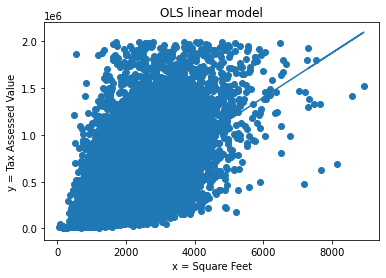

In [22]:
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.plot(train.calculatedfinishedsquarefeet, train.yhat)
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('OLS linear model');

3.) Plot the residuals for the linear regression model that you made.

In [23]:
# residual = actual - predicted
train['residual'] = train.taxvaluedollarcnt - train.yhat
train['baseline_residual'] = train.taxvaluedollarcnt - train.baseline

In [24]:
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual
41889,3206,893912,399515.828687,733619.851292,160292.148708,494396.171313
5887,1255,140436,399515.828687,269272.676676,-128836.676676,-259079.828687
38956,1049,623196,399515.828687,220243.707957,402952.292043,223680.171313
915,1675,354714,399515.828687,369234.651734,-14520.651734,-44801.828687
35420,3064,945376,399515.828687,699823.183534,245552.816466,545860.171313


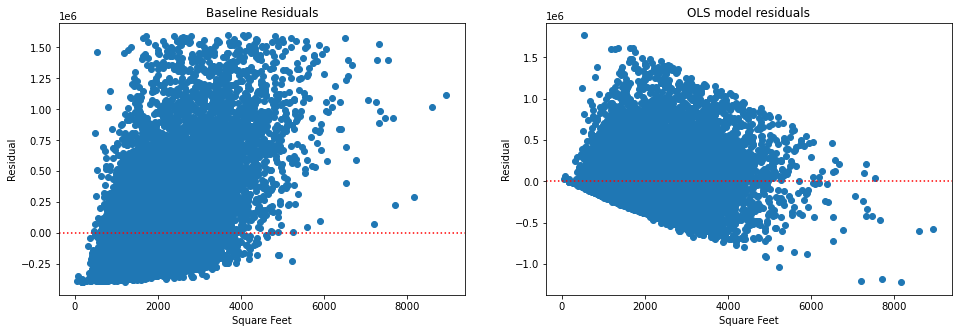

In [30]:
plt.figure(figsize = (16,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [27]:
baseline_residual_min = train.baseline_residual.min()
baseline_residual_max = train.baseline_residual.max()
residual_min = train.residual.min()
residual_max = train.residual.max()

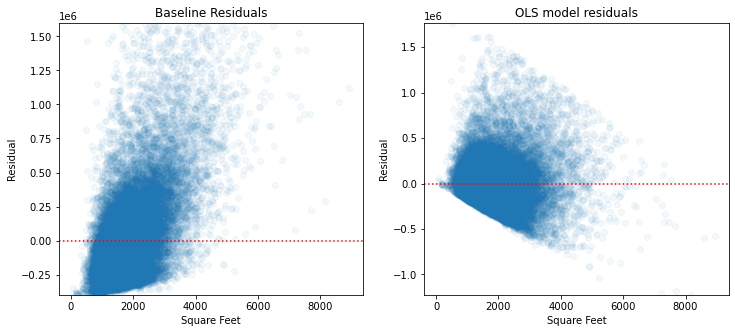

In [64]:
plt.figure(figsize = (12,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual, alpha=.05)
plt.axhline(y = 0, ls = ':', color='red')
plt.ylim(baseline_residual_min, baseline_residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual, alpha=.05)
plt.axhline(y = 0, ls = ':', color ='red')
plt.ylim(residual_min, residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [ ]:
# Takeaway:

# There's a slope in the residuals

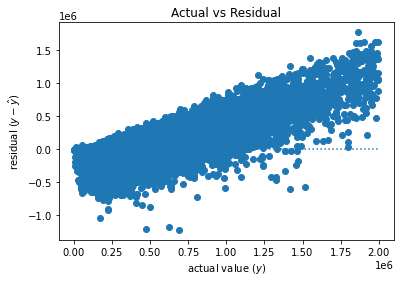

In [44]:
actual = train.taxvaluedollarcnt
predicted = train.yhat
residuals = actual - predicted
plt.hlines(0, actual.min(), actual.max(), ls=':')
plt.scatter(actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')
plt.show()

4.) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [49]:
train['residual^2'] = train.residual**2
train['residual_baseline^2'] = train.baseline_residual**2
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2,residual_baseline^2
41889,3206,893912,399515.828687,733619.851292,160292.148708,494396.171313,2.569357e+10,2.444276e+11,2.444276e+11
5887,1255,140436,399515.828687,269272.676676,-128836.676676,-259079.828687,1.659889e+10,6.712236e+10,6.712236e+10
38956,1049,623196,399515.828687,220243.707957,402952.292043,223680.171313,1.623705e+11,5.003282e+10,5.003282e+10
915,1675,354714,399515.828687,369234.651734,-14520.651734,-44801.828687,2.108493e+08,2.007204e+09,2.007204e+09
35420,3064,945376,399515.828687,699823.183534,245552.816466,545860.171313,6.029619e+10,2.979633e+11,2.979633e+11


In [50]:
# SSE
SSE = sum(train['residual^2'])
SSE_baseline = sum(train['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  1946151478188091.0
SSE - baseline =  3022612135125772.0


In [52]:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  63674632842.170235
MSE baseline =  98894520845.62793


In [53]:
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  252338.3
RMSE baseline =  314475.0


6.) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [54]:
if SSE < SSE_baseline:
    print('OLS Regression Model Performs Better than Baseline')
else:
    print('OLS Regression Model Performs Worse than Baseline')

OLS Regression Model Performs Better than Baseline


7.) What is the amount of variance explained in your model?

In [59]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(train.taxvaluedollarcnt, train.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.356


8.) Is your model better than the baseline model?

yes